<a href="https://colab.research.google.com/github/mikeusru/neural-network-training/blob/main/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

![cnn](https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1)


Let's load some sample images to work with. We'll use the ol' reliable sklearn here.

In [2]:
from sklearn.datasets import load_sample_image
import numpy as np

china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

batch_size, height, width, channels = images.shape

Now what if we make our own filters? Let's see how these work.

{(3, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ed29d0>,
 (3, 0, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7e81290>,
 (3, 0, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ed2d10>,
 (3, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ee2090>,
 (3, 1, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7e81550>,
 (3, 1, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ee2390>,
 (3, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ee2610>,
 (3, 2, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7e81810>,
 (3, 2, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ee2910>,
 (3, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ee2bd0>,
 (3, 3, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7e81ad0>,
 (3, 3, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ee2e90>,
 (3, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f40d7ef1190>,

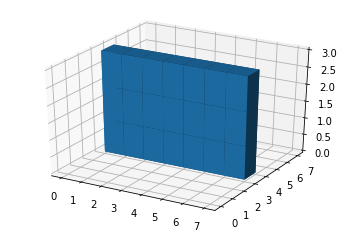

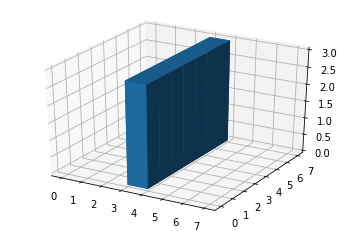

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)

filters[:,3,:,0] = 1 # vertical line
filters[3,:,:,1] = 1 # horizontal line

fig = plt.figure()
ax = plt.gca(projection='3d')
ax.voxels(filters[:,:,:,0])

fig = plt.figure()
ax = plt.gca(projection='3d')
ax.voxels(filters[:,:,:,1])

## Apply filter and view feature map

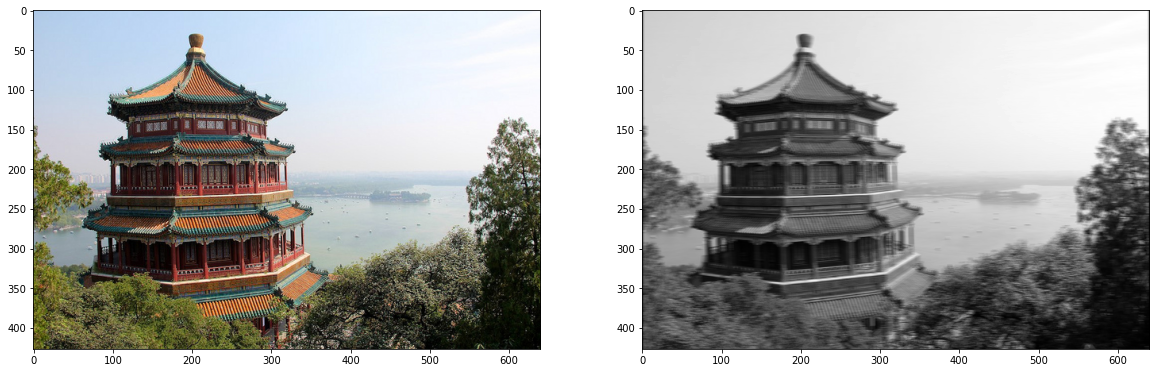

In [26]:
import tensorflow as tf
from tensorflow import keras

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(china)
plt.subplot(122)
plt.imshow(outputs[0,:,:,1], cmap="gray") #1st image's 2nd feature map


Instead of making our own filters, let's create trainable ones

In [27]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

## Max Pooling layer

In [28]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

## Predicting with the Fashion MNIST using a CNN
First we load and standardize our data

In [29]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4423680/4422102 [==============================] - 0s 0us/step


In [30]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64, 7, activation='relu', padding="same", input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation="softmax"),                      
                                 ])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         1

Now let's train the model. This takes a while!

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 544s 316ms/step - loss: 1.2150 - accuracy: 0.6212 - val_loss: 0.3613 - val_accuracy: 0.8650
Epoch 2/10
1719/1719 [==============================] - 535s 311ms/step - loss: 0.4347 - accuracy: 0.8542 - val_loss: 0.3045 - val_accuracy: 0.8882
Epoch 3/10
1719/1719 [==============================] - 535s 311ms/step - loss: 0.3649 - accuracy: 0.8782 - val_loss: 0.2988 - val_accuracy: 0.8914
Epoch 4/10
1719/1719 [==============================] - 536s 312ms/step - loss: 0.3228 - accuracy: 0.8896 - val_loss: 0.3152 - val_accuracy: 0.8870
Epoch 5/10
1719/1719 [==============================] - 537s 312ms/step - loss: 0.3018 - accuracy: 0.8973 - val_loss: 0.2720 - val_accuracy: 0.9016
Epoch 6/10
1719/1719 [==============================] - 536s 312ms/step - loss: 0.2813 - accuracy: 0.9057 - val_loss: 0.2898 - val_accuracy: 0.9026
Epoch 7/10
1719/1719 [==============================] - 536s 312ms/step - loss: 0.2679 - accuracy: 0.9057 - val_

KeyboardInterrupt: ignored